## 1. Google Play ストアのアプリとレビュー
<p>現在、モバイルアプリは普及し、作成は簡単で、収益性が高いです。これの要因により、ますます多くのアプリが開発されています。このノートブックでは、Google Playのさまざまなカテゴリにわたる1万以上のアプリを比較することにより、Androidアプリ市場の包括的な分析を行います。データから洞察を見つけて、成長と維持を促進する戦略を考案します。</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>2つのファイルで構成されるデータを見てみましょう。</p>
<ul>
<li><code>apps.csv</code>: Google Play 上のアプリケーションの詳細がすべて含まれています。アプリを説明する13のカテゴリーがあります。</li>
<li><code>user_reviews.csv</code>: 各アプリに100件のレビューが含まれております。<a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">アプリの評価の仕方</a> 各レビューのテキストは前処理され、感情 (肯定的、否定的、または中立)、感情の極性、感情の主観性という3つの新しい機能によって属性が付けられます。</li>
</ul>

In [14]:
# データセットを読み取み
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# apps_with_duplicates から重複を削除
apps = apps_with_duplicates.drop_duplicates()

# アプリの総数を出力
print('データセット内のアプリの総数 =', len(apps))

# Have a look at a random sample of 5 rows
apps.sample(n=5)

データセット内のアプリの総数 = 9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3261,4118,CTRL-F - Search the real world,PRODUCTIVITY,4.4,607,37.0,"50,000+",Free,0,Everyone,Productivity,"July 24, 2016",1.1,4.0.3 and up
9015,10179,Golden HoYeah Slots - Real Casino Slots,GAME,4.4,201537,68.0,"5,000,000+",Free,0,Teen,Casino,"August 1, 2018",2.1.7,4.0.3 and up
6789,7848,Smokes for CS:GO,FAMILY,3.9,3253,3.6,"100,000+",Free,0,Everyone,Entertainment,"April 10, 2015",1.3,2.2 and up
1087,1317,Google Fit - Fitness Tracking,HEALTH_AND_FITNESS,3.9,249855,NaN,"10,000,000+",Free,0,Everyone,Health & Fitness,"July 24, 2018",Varies with device,Varies with device
5222,6221,BH by Kinomap,HEALTH_AND_FITNESS,2.9,141,22.0,"10,000+",Free,0,Everyone,Health & Fitness,"July 30, 2018",3.2.9,4.1 and up


## 2. データクリーニング
 <code>Installs</code> と <code>Price</code> 特殊な文字がいくつかあります(<code>+</code> <code>,</code>) 数値の表現方法が原因ですが、これにより、列が純粋に数値になることがなくなり、その後の数学的計算で列を使用することが困難になります。 数字のみが含まれるようにする必要があります。</p>
<p>したがって、データのクリーンアップする必要があります。<code>,</code> と <code>+</code> を <code>Installs</code> 列 と<code>Price</code> 列 から削除する必要があります。</p>

In [15]:
# 削除する文字のリスト
chars_to_remove = ["+", ",", "$"]
# クリーンアップする列名のリスト
cols_to_clean = ["Installs", "Price"]

# Cols_to_clean の各列のループ
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
# アプリのデータフレームの概要を出力
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. データ型の修正
 <code>Installs</code> と <code>Price</code> は <code>object</code>データタイプとして使われています。これを<code>int</code> もしくは <code>float</code>)に直す必要があります。 
 
<code>Size</code> と <code>Rating</code> は <code>float</code>になっていますが、<code>Installs</code> と <code>Price</code>列を数値に直す必要があります。</p>

In [16]:
import numpy as np

# インストールをfloatデータ型に変換
apps["Installs"] = apps["Installs"].astype(float)

# 価格を浮動データ型に変換
apps["Price"] = apps["Price"].astype(float)

# アプリのデータフレームを確認
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


   ## 4. アプリのカテゴリ調査
Google Playは、世界 190 か国に 10 億人を超えるアクティブユーザーがいます。企業がアプリをユーザーに提供するには、アプリを Google Play でより迅速かつ簡単に見つけられるようにすることが重要です。 全体的な検索エクスペリエンスを向上させるために、Google はアプリをカテゴリーにグループ化する概念を導入しました。

<p>このような質問が浮かび上がってきます:</p>
<ul>
<li>市場でアプリのシェアが最も高いのはどのカテゴリーですか?</li>
<li>市場を支配している特定のカテゴリーはありますか?</li>
<li>アプリの数が最も少ないカテゴリーはどれですか?</li>
</ul>

In [17]:
# カテゴリーの総数を出力
num_categories =  len(apps['Category'].unique())
print('カテゴリーの数 =',num_categories)

カテゴリーの数 = 33


In [18]:
# 「カテゴリー」ごとにアプリの数を数える
num_apps_in_category = apps['Category'].value_counts()

In [19]:
print(num_apps_in_category)

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


In [20]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# 各カテゴリーのアプリ数に基づいて num_apps_in_category を降順に並べ替える
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

   - データセットには <code>33</code> 個の固有のアプリ カテゴリが存在することがわかります。ファミリーアプリとゲームアプリが市場で最も普及しています。 興味深いことに、ツール、ビジネス、医療アプリも上位にランクインしています。

## 5. アプリ評価の分布
<p>アプリの各カテゴリの市場シェアを確認した後、これらすべてのアプリが平均してどのようにパフォーマンスを発揮するかを見てみましょう。 アプリの評価 (1から5のスケール) は、アプリの見つけやすさ、会社全体のブランドイメージに影響を与えます。評価はアプリの重要なパフォーマンス指標です。</p>

In [21]:
# アプリの平均評価
avg_app_rating = apps['Rating'].mean()
print('アプリの平均評価 =',avg_app_rating)

アプリの平均評価 = 4.173243045387994


In [22]:
data = [go.Histogram(
        x = apps['Rating']
)]

# アプリの平均評価を示すグラフを表示
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

<p>すべてのアプリカテゴリーの平均評価数は 4.17 であることがわかりました。 ヒストグラムプロットは左に歪んでいます。これは、低評価のアプリの少数の例外を除いて、大部分のアプリが高評価されていることを示しています。</p>

## 6. アプリのサイズと価格
<p>次に、アプリのサイズとアプリの価格を調べてみましょう。 サイズに関しては、モバイルアプリが大きすぎると、ユーザーがダウンロードするのが難しくなったり、ダウンロードが高価になったりする可能性があります。 ダウンロード時間が長いと、モバイルアプリを体験する前にユーザーが離れてしまう可能性があります。 さらに、各ユーザーのデバイスのディスク容量には限りがあります。 価格については、アプリが無料か安価であることを期待するユーザーもいます。 発展途上国がターゲット市場の一部である場合、これらの問題はさらに複雑になります。 特にインターネットの速度、収益力、為替レートによるものです。</p>
<p>アプリのサイズと価格を設定する戦略を効果的に考案するにはどうすればよいでしょうか?</p>
<ul>
<li>アプリのサイズは評価に影響しますか? </li>
<li>ユーザーはシステム負荷の高いアプリを本当に気にしているのでしょうか。それとも軽量のアプリを好むのでしょうか? </li>
<li>アプリの価格は評価に影響しますか? </li>
<li>ユーザーは常に有料アプリよりも無料アプリを好むのでしょうか?</li>
</ul>


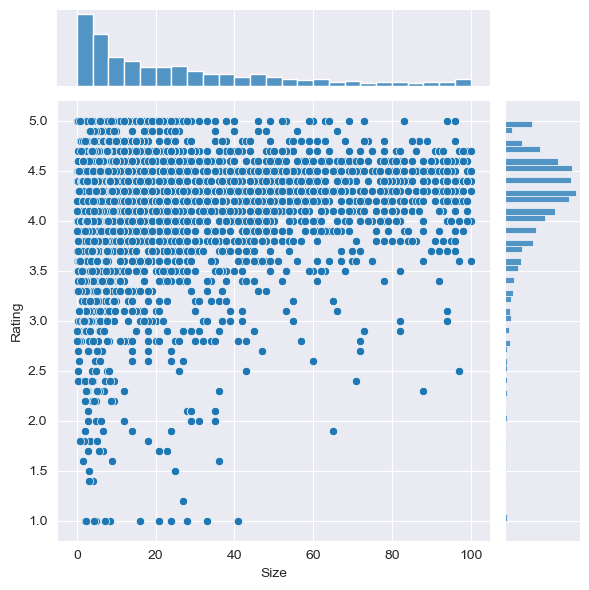

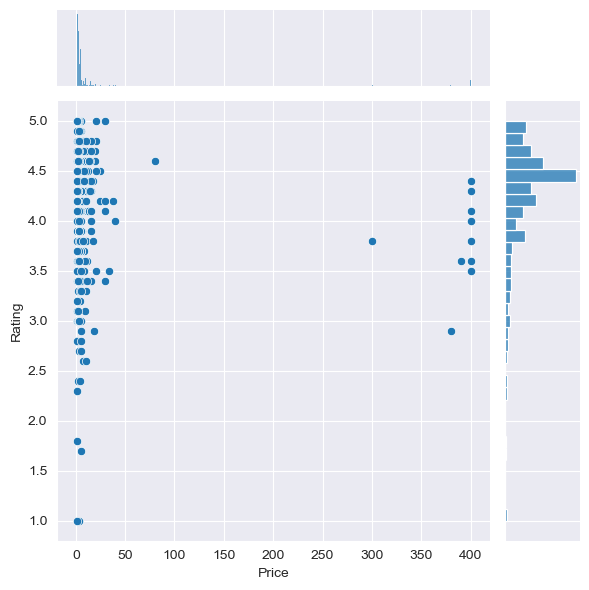

In [23]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# 「Rating」値と「Size」値の両方が存在する行を選択
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps["Size"].isnull())]

# 少なくとも250個のアプリを含むカテゴリのサブセット
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)


# プロットサイズと評価の比較
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])


# 「タイプ」が「有料」のアプリを選択
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"] 


# プロット価格と評価
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])


<p>最も評価の高いアプリ (評価 4 以上) の大半は 2 MB から 20 MB の範囲であることがわかりました。 また、大多数のアプリの価格は 10 ドル未満であることもわかりました。</p>

## 7. アプリカテゴリーとアプリ価格の関係
<p>企業や開発者はどうやってビジネス計画を立てるべきなのでしょうか? 企業は利益を最大化するためにどのような収益化戦略を使用できますか? アプリのコストは主に、機能、複雑さ、プラットフォームによって決まる可能性が高いです。</p>
<p>モバイル アプリに適切な価格設定戦略を選択する際には、考慮すべき要素が数多くあります。 顧客がアプリに対して支払いを行う意思があるかどうかを考慮することが重要です。 価格を間違えると、ダウンロードが行われる前に契約が破棄される可能性があります。 潜在的な顧客は、衝撃的な費用であると感じて離れてしまう可能性があります。あるいは、あまりにも多くの広告を受信したり、単にお金の価値がなかったため、ダウンロードしたアプリを削除したりする可能性があります。</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


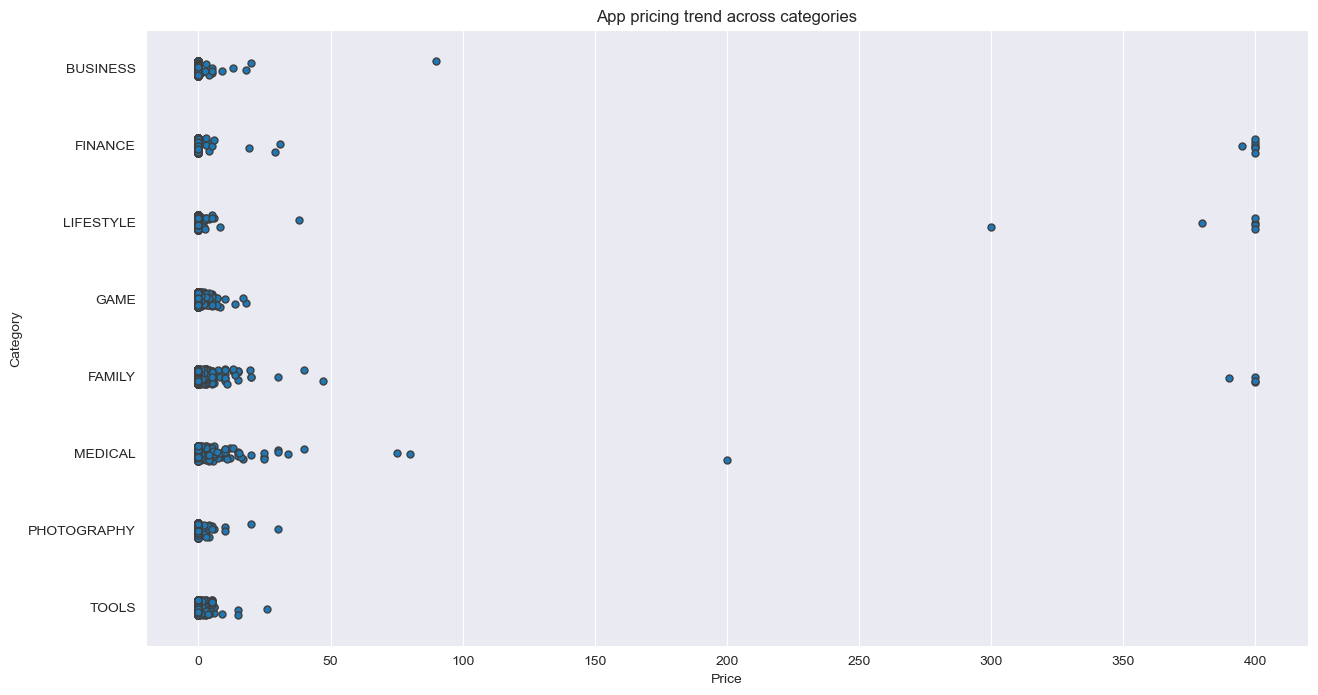

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# 人気のあるアプリのカテゴリをいくつか選択します。
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# 価格とカテゴリをプロットして価格傾向を調べる
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# 価格が200を超えるアプリ
apps_above_200 = popular_app_cats[popular_app_cats["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

<p>カテゴリーが異なれば、求められる価格帯も異なります。電卓アプリなど、シンプルで毎日使用する一部のアプリは、おそらく無料にしておくべきですが、 糖尿病患者を診断する高度に専門化された医療アプリに課金するのは理にかなっています。 以下では、<em>医療および家族向け</em>　のアプリが最も高価であることがわかります。 医療アプリによっては、最大80ドルまで延長される場合もあります。 すべてのゲームアプリは20ドル以下の手頃な価格です。</p>

## 8. 「ジャンク」アプリをフィルターで除外する。
<p>本当に高価なアプリの多くは「ジャンク」アプリのようです。 つまり、実際には目的を持たないアプリです。 一部のアプリ開発者は遊びで、またはアプリ開発スキルをテストするために、アプリを作成する場合があります。一部の開発者は悪意を持ってこれを実行し、ユーザーがストアでアプリの購入を誤ってクリックすることを期待してお金を稼ごうとします。</p>
<p>これらの迷惑アプリをフィルタリングして除外し、視覚化をやり直してみましょう。</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

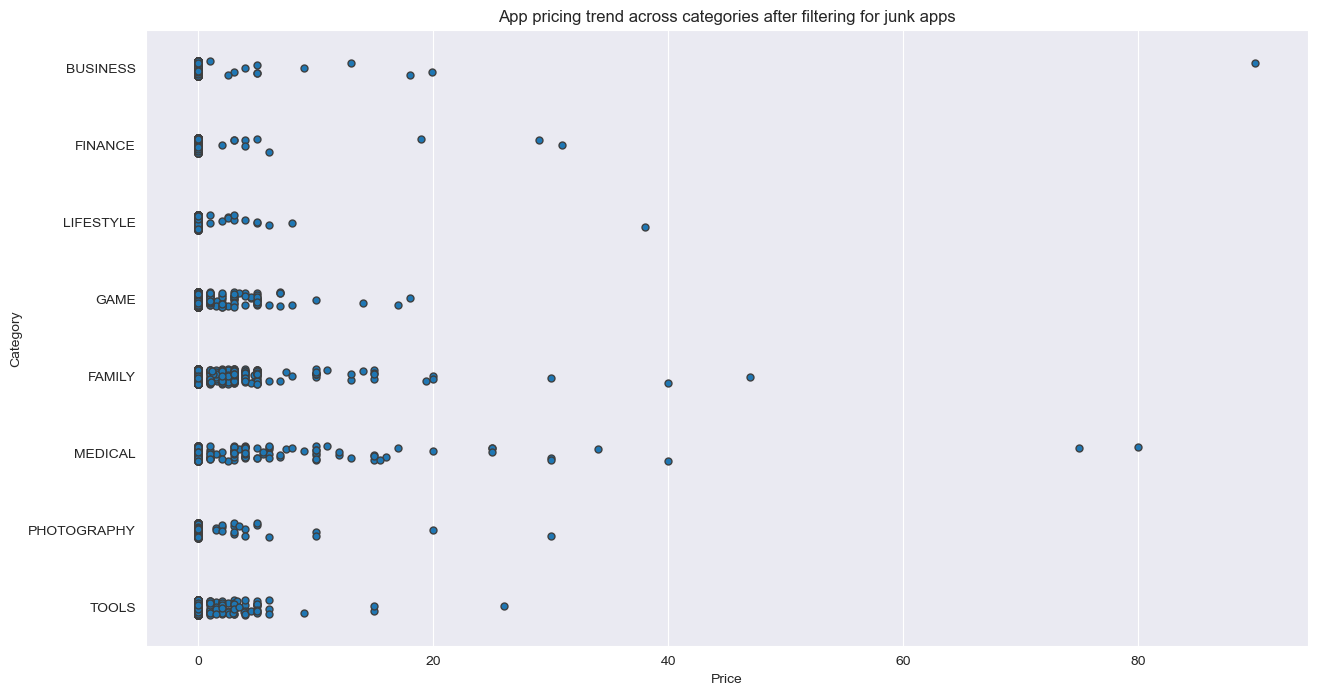

In [25]:
# 100ドル未満のアプリを選択してください
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# 本物のアプリ (apps_under_100) で価格とカテゴリを調べます
ax = sns.stripplot(x = apps_under_100["Price"], y = apps_under_100["Category"], jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. 有料アプリと無料アプリの人気
<p>現在、Play ストアのアプリには、無料、フリーミアム、有料、ペイミアム、サブスクリプションの5種類の価格設定戦略があります。無料アプリと有料アプリのみに焦点を当てましょう。無料アプリには次のような特徴があります。</p>
<ul>
<li>無料でダウンロードできる</li>
<li>主な収入源は広告であることが多い</li>
<li>多くの場合、他の製品を所有する企業によって作成され、アプリはそれらの製品の拡張機能として機能</li>
<li>顧客維持、コミュニケーション、顧客サービスのツールとして機能</li>
</ul>
<p>有料アプリには次のような特徴があります。</p>
<ul>
<li>ユーザーは、アプリをダウンロードして使用するために一度支払いを求められます。</li>
<li>ユーザーは、購入する前にアプリの感触を実際に知ることはできません。</li>
</ul>

In [26]:
trace0 = go.Box(
    # 有料アプリのデータ
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # 無料アプリのデータ
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# プロット用のリストにtrace0とtrace1を追加します。
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

<p>有料アプリは無料アプリと同じくらいインストールされていますか? 有料アプリのインストール数は無料アプリよりも相対的に低いことがわかりましたが、その差は私が予想していたほど顕著ではありませんでした。</p>

## 10. ユーザーレビューの感情分析
<p>ユーザー レビュー データをマイニングして、製品、ブランド、サービスについて人々がどのように感じているかを判断するには、センチメント分析と呼ばれる手法を使用します。 アプリのユーザー レビューを分析して、そのアプリに対する雰囲気が肯定的か否定的か、中立的かを特定できます。 たとえば、アプリのレビューの肯定的な言葉には、「素晴らしい」、「フレンドリー」、「良い」、「素晴らしい」、「愛」などの言葉が含まれる場合があります。 否定的な言葉としては、「マルウェア」、「嫌い」、「問題」、「返金」、「無能」などの言葉が考えられます。</p>


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

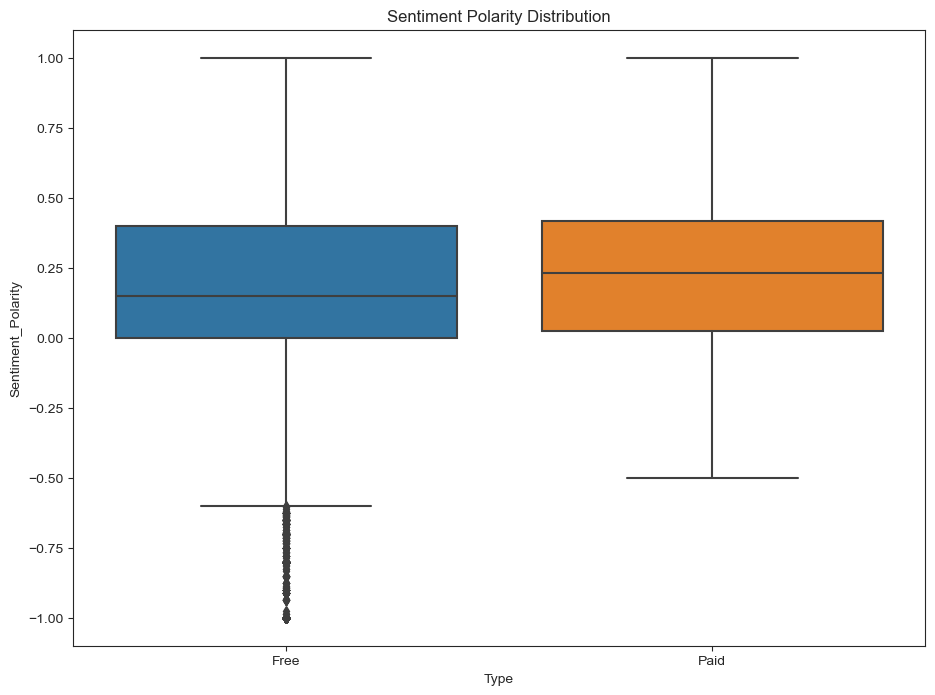

In [133]:
# user_reviews.csvをロードする
reviews_df = pd.read_csv("datasets/user_reviews.csv")

# 2 つのデータフレームを結合する
merged_df = apps.merge(reviews_df)

# NA 値をセンチメント列とレビュー列から削除します
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# 有料アプリと無料アプリに対するユーザー レビューの感情の極性
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

## 11. 分析結果
<p>有料アプリと無料アプリのユーザー レビューの感情極性スコアをプロットすると、負の Y 軸の外れ値が示すように、無料アプリが多くの厳しいコメントを受けていることがわかります。 有料アプリのレビューが極端に否定的になることはないようです。 これは、アプリの品質に関する何かを示している可能性があります。つまり、有料アプリは平均して無料アプリよりも高品質です。 有料アプリの極性スコアの中央値は無料アプリよりもわずかに高く、以前の観察と同期しています。このノートブックでは、Google Play ストアの 1 万以上のアプリを分析しました。 自分でアプリを作成したい場合は、調査結果を使用して決定を伝えることができます。</p>